In [1]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import uproot
import os
import glob
import awkward as ak
from scipy.stats import norm
plt.rcParams["xtick.top"] = True    # enable top x-ticks
plt.rcParams["ytick.right"] = True  # enable right y-ticks
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

In [2]:
data_path = "/home/haue/repositories/Masters/data/alphas/Al/"
bgpath =  "/home/haue/repositories/Masters/data/sorted/background"

Al_files = glob.glob(os.path.join(data_path, "*mlio.root"))
bgfiles = glob.glob(os.path.join(bgpath, "*.root"))

In [4]:

Eb = np.array([])
for batch in uproot.iterate(bgfiles, expressions=["E"],
                            cut="(id==1) | (id==2)"):
    Eb = np.append(Eb, ak.flatten(batch.E))


Eb1 = np.array([])
for batch in uproot.iterate(bgfiles, expressions=["E"],
                            cut="(id==1)"):
    Eb1 = np.append(Eb1, ak.flatten(batch.E))


Eb2 = np.array([])
for batch in uproot.iterate(bgfiles, expressions=["E"],
                            cut="(id==2)"):
    Eb2 = np.append(Eb2, ak.flatten(batch.E))


Eb3 = np.array([])
for batch in uproot.iterate(bgfiles, expressions=["E"],
                            cut="(id==3)"):
    Eb3 = np.append(Eb3, ak.flatten(batch.E))
    
E = np.array([]); Edep = np.array([])
for batch in uproot.iterate(Al_files, expressions=["Ea","Edep"],
                            cut="(id==1) | (id==2)"):
    E = np.append(E, ak.flatten(batch.Ea))
    Edep = np.append(Edep, ak.flatten(batch.Edep))
    
E1 = np.array([])
for batch in uproot.iterate(Al_files, expressions=["Ea"],
                            cut="(id==1)"):
    E1 = np.append(E1, ak.flatten(batch.Ea))
E2 = np.array([])
for batch in uproot.iterate(Al_files, expressions=["Ea"],
                            cut="(id==2)"):
    E2 = np.append(E2, ak.flatten(batch.Ea))


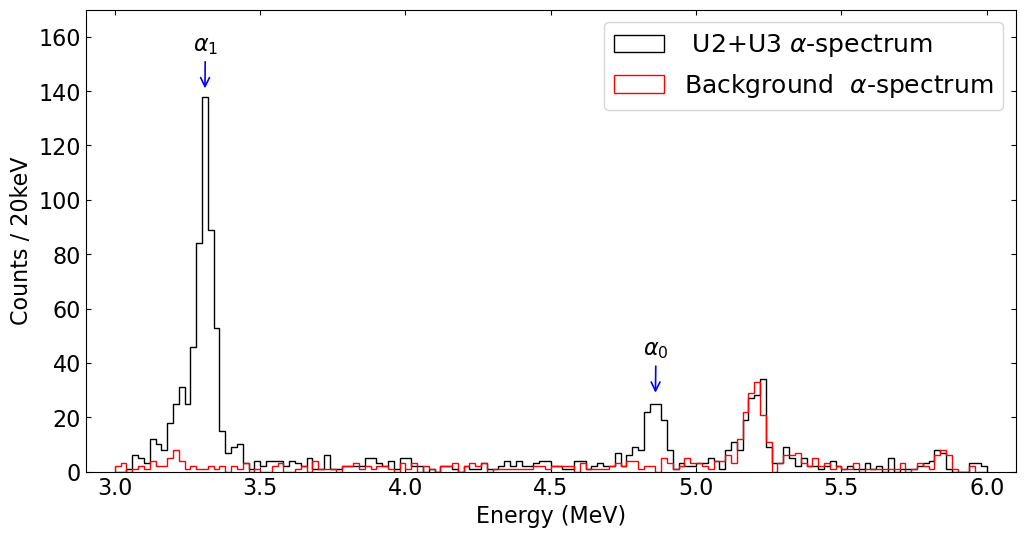

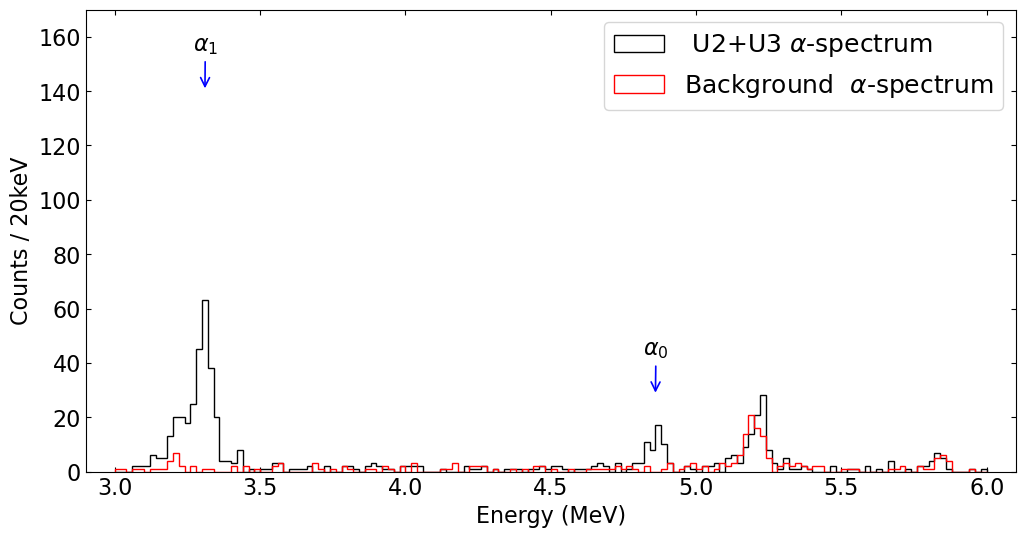

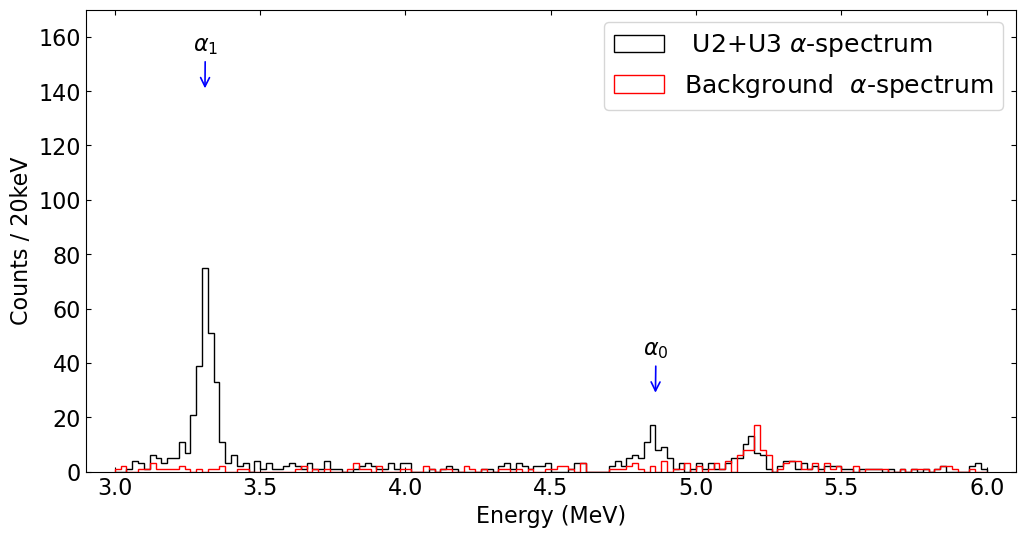

In [6]:
es = [E, E1, E2]
es_b = [Eb, Eb1, Eb2]
i = 0
for e,eb in zip(es,es_b):

    plt.rcParams.update({'font.size': 16})
    plt.figure(figsize=(12,6))
    plt.hist(e/1e3, bins=np.arange(3,6+0.02,0.02), histtype='step', color='k', label=r" U2+U3 $\alpha$-spectrum")
    plt.hist(eb*1.009/1e3, bins=np.arange(3,6+0.02,0.02), histtype='step', color='r', label=r"Background  $\alpha$-spectrum")
    plt.yscale('linear')
    plt.xlabel("Energy (MeV)")
    plt.ylabel("Counts / 20keV")
    plt.xticks(np.arange(2,7,0.5))
    plt.xlim(2.9,6.1)
    plt.ylim(0,170)
    plt.legend(fontsize=18)
    plt.annotate(r"$\alpha_1$", (3.31,140), (3.268,155), arrowprops=dict(arrowstyle="->", lw=1.2, color="blue"), fontsize=16)
    plt.annotate(r"$\alpha_0$", (4.86,28), (4.818,43), arrowprops=dict(arrowstyle="->", lw=1.2, color="blue"), fontsize=16)

    if i==0:
        plt.savefig("alphaspec.pdf")
    plt.show()
    i+=1


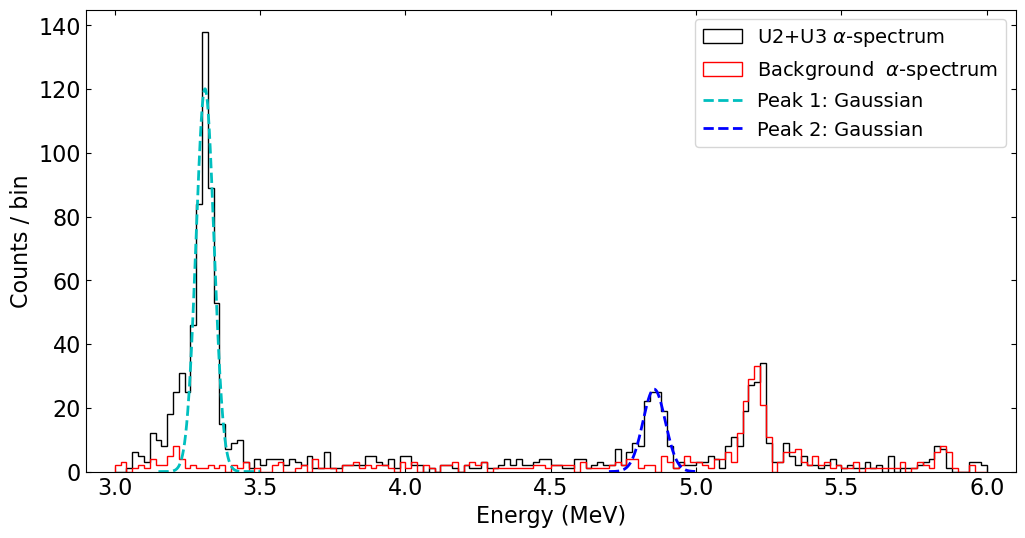

Peak 1 (3.15–3.5 MeV):
mu = 3.310(8) MeV (χ²/ndof = 7.88)

Counts in peak 1 is 576.0 and the background is 38
The true event counts is therefore 538.0 +/- 25

Peak 2 (4.7–5 MeV):
mu = 4.856(6) MeV (χ²/ndof = 2.51)
Counts in peak 2 is 141.0 and the background is 39
The true event counts is therefore 102.0 +/- 13


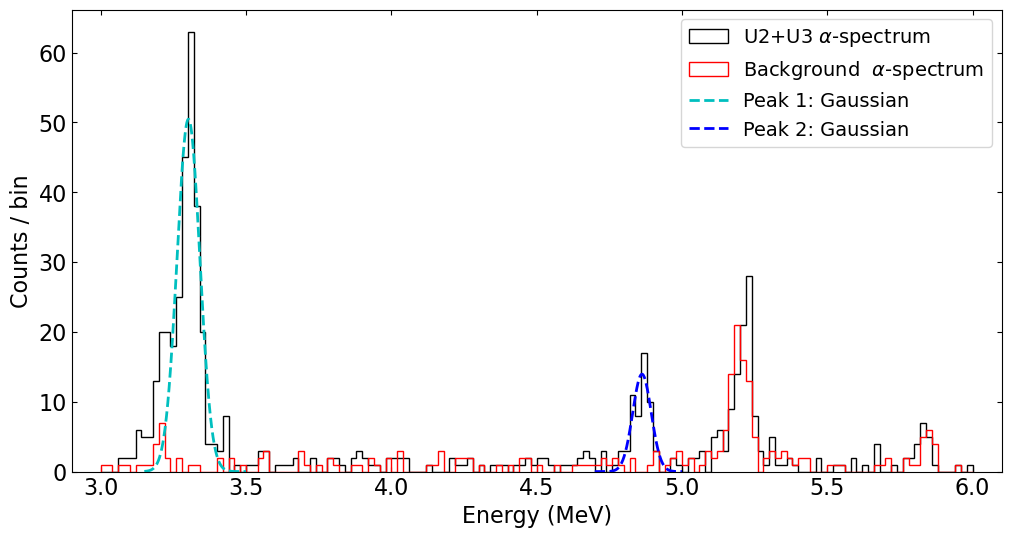

Peak 1 (3.15–3.5 MeV):
mu = 3.302(12) MeV (χ²/ndof = 5.58)

Counts in peak 1 is 292.0 and the background is 24
The true event counts is therefore 268.0 +/- 18

Peak 2 (4.7–5 MeV):
mu = 4.862(6) MeV (χ²/ndof = 1.64)
Counts in peak 2 is 62.0 and the background is 19
The true event counts is therefore 43.0 +/- 9


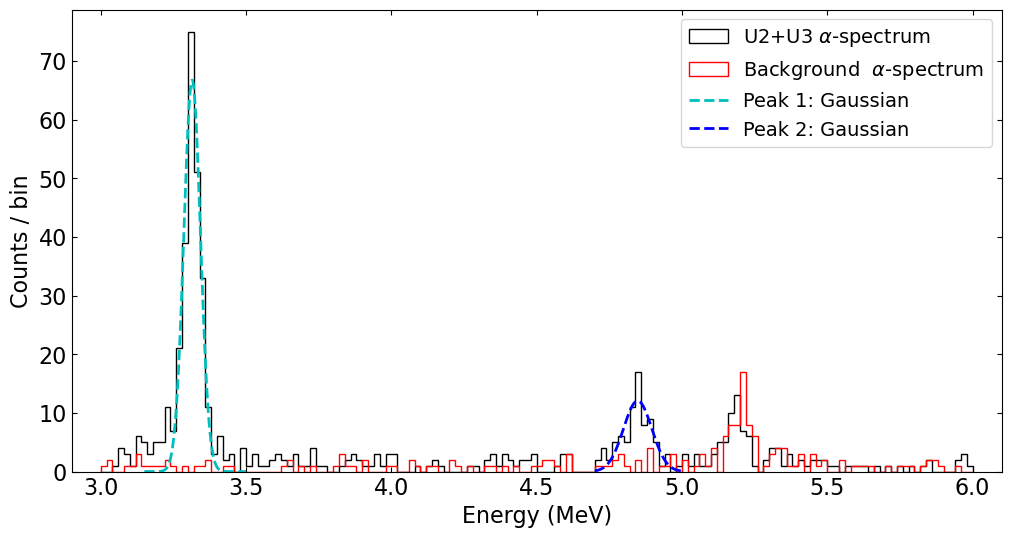

Peak 1 (3.15–3.5 MeV):
mu = 3.315(4) MeV (χ²/ndof = 3.28)

Counts in peak 1 is 284.0 and the background is 14
The true event counts is therefore 270.0 +/- 17

Peak 2 (4.7–5 MeV):
mu = 4.847(8) MeV (χ²/ndof = 1.44)
Counts in peak 2 is 79.0 and the background is 20
The true event counts is therefore 59.0 +/- 10


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit



for e,eb in zip(es,es_b):
        
    e = np.array(e, dtype=float)  
    bins = np.arange(3, 6+0.02, 0.02)
    counts, bin_edges = np.histogram(e/1e3, bins=bins)
    centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    counts = counts.astype(float)

    eb = np.array(eb, dtype=float)  
    bins = np.arange(3, 6+0.02, 0.02)
    counts_b, bin_edges_b = np.histogram(eb*1.009/1e3, bins=bins)
    counts_b = counts_b.astype(float)


    def gauss(x, A, mu, sigma):
        return A * np.exp(-(x - mu)**2 / (2*sigma**2))

    mask1 = (centers >= 3.15) & (centers <= 3.5)
    centers1 = centers[mask1]
    counts1 = counts[mask1]
    counts1_b = counts_b[mask1]
    fit1zone_counts = np.sum(counts1)
    fit1zone_counts_err = np.sqrt(fit1zone_counts)
    fit1bg_counts = np.sum(counts1_b)
    fit1bg_counts_err = np.sqrt(fit1bg_counts)
    p0_1 = [max(counts1), 3.3, 0.05]
    popt1, pcov1 = curve_fit(gauss, centers1, counts1, p0=p0_1)
    

    valid1 = counts1 > 0
    residuals1 = counts1[valid1] - gauss(centers1[valid1], *popt1)
    sigma1 = np.sqrt(counts1[valid1])
    chi2_1 = np.sum((residuals1 / sigma1)**2)
    ndof_1 = len(counts1[valid1]) - len(popt1)
    reduced_chi2_1 = chi2_1 / ndof_1
    

    mask2 = (centers >= 4.7) & (centers <= 5)
    centers2 = centers[mask2]
    counts2 = counts[mask2]
    counts2_b = counts_b[mask2]
    fit2zone_counts = np.sum(counts2)
    fit2zone_counts_err = np.sqrt(fit2zone_counts)
    fit2bg_counts = np.sum(counts2_b)
    fit2bg_counts_err = np.sqrt(fit2bg_counts)
    p0_2 = [max(counts2), 4.82, 0.01]
    popt2, pcov2 = curve_fit(gauss, centers2, counts2, p0=p0_2)

    valid2 = counts2 > 0
    residuals2 = counts2[valid2] - gauss(centers2[valid2], *popt2)
    sigma2 = np.sqrt(counts2[valid2])
    chi2_2 = np.sum((residuals2 / sigma2)**2)
    ndof_2 = len(counts2[valid2]) - len(popt2)
    reduced_chi2_2 = chi2_2 / ndof_2



    pcov1_scaled = pcov1 * reduced_chi2_1
    pcov2_scaled = pcov2 * reduced_chi2_2
    mu_err1 = np.sqrt(pcov1_scaled[1, 1])
    mu_err2 = np.sqrt(pcov2_scaled[1, 1])
    plt.figure(figsize=(12,6))
    plt.hist(e/1e3, bins=bins, histtype='step', color='k', label=r"U2+U3 $\alpha$-spectrum")
    plt.hist(eb*1.009/1e3, bins=np.arange(3,6+0.02,0.02), histtype='step', color='r', label=r"Background  $\alpha$-spectrum")


    E_fit1 = np.linspace(3.15,3.5,300)
    plt.plot(E_fit1, gauss(E_fit1, *popt1), 'c--', lw=2, label='Peak 1: Gaussian')

    E_fit2 = np.linspace(4.7,5,200)
    plt.plot(E_fit2, gauss(E_fit2, *popt2), 'b--', lw=2, label='Peak 2: Gaussian')

    plt.xlabel("Energy (MeV)")
    plt.ylabel("Counts / bin")
    plt.xlim(2.9,6.1)
    plt.legend(fontsize=14)
    plt.show()

    fit1counts_err = np.sqrt(fit1zone_counts_err**2+fit1bg_counts_err**2)
    fit2counts_err = np.sqrt(fit2zone_counts_err**2+fit2bg_counts_err**2)

    print("Peak 1 (3.15–3.5 MeV):")
    print(f"mu = {popt1[1]:.3f}({mu_err1*1e3:.0f}) MeV (χ²/ndof = {reduced_chi2_1:.2f})\n")
    print(f"Counts in peak 1 is {fit1zone_counts} and the background is {fit1bg_counts:.0f}")
    print(f"The true event counts is therefore {fit1zone_counts-fit1bg_counts} +/- {fit1counts_err:.0f}")
    print()

    print("Peak 2 (4.7–5 MeV):")
    print(f"mu = {popt2[1]:.3f}({mu_err2*1e3:.0f}) MeV (χ²/ndof = {reduced_chi2_2:.2f})")
    print(f"Counts in peak 2 is {fit2zone_counts} and the background is {fit2bg_counts:.0f}")
    print(f"The true event counts is therefore {fit2zone_counts-fit2bg_counts} +/- {fit2counts_err:.0f}")
